In [1]:
import pandas as pd
import requests as r
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.statespace.sarimax import SARIMAX
import tensorflow as tf

In [116]:
api_key = "aBIdeyJp18dnYHxOLyICUOdCfrz7C2g1VFRdCQbx"


In [117]:
solar_monthly_url = f"https://api.eia.gov/v2/electricity/electric-power-operational-data/data/?frequency=monthly&data[0]=generation&facets[fueltypeid][]=SPV&facets[location][]=MO&facets[sectorid][]=99&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={api_key}"
wind_monthly_url = f"https://api.eia.gov/v2/electricity/electric-power-operational-data/data/?frequency=monthly&data[0]=generation&facets[fueltypeid][]=WND&facets[location][]=MO&facets[sectorid][]=99&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={api_key}"

In [118]:
try:
    (request := r.get(solar_monthly_url))
    print("Success")
except Exception as e:
    print(e)

Success


In [119]:
json_data = request.json()

In [120]:
solar_generation = pd.DataFrame(json_data.get('response').get('data'))

In [121]:
solar_generation.head()

,period,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription,generation,generation-units
0,2023-01,MO,Missouri,99,All Sectors,SPV,solar photovoltaic,9.56056,thousand megawatthours
1,2022-12,MO,Missouri,99,All Sectors,SPV,solar photovoltaic,7.20169,thousand megawatthours
2,2022-11,MO,Missouri,99,All Sectors,SPV,solar photovoltaic,9.47591,thousand megawatthours
3,2022-10,MO,Missouri,99,All Sectors,SPV,solar photovoltaic,14.40455,thousand megawatthours
4,2022-09,MO,Missouri,99,All Sectors,SPV,solar photovoltaic,15.42541,thousand megawatthours


In [122]:
solar_generation.period = pd.to_datetime(solar_generation.period)

<AxesSubplot:xlabel='period', ylabel='generation'>

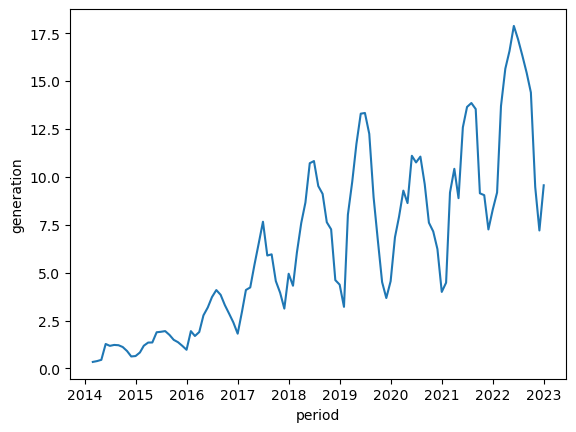

In [123]:
sns.lineplot(x="period",y="generation",data=solar_generation)

In [124]:
index=pd.DatetimeIndex(solar_generation.period).to_period("M")
y = pd.Series(solar_generation.generation.values, index=index)
arima = ARIMA(y,order=(2,0,2)).fit()

C:\Users\jwj8c8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jwj8c8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jwj8c8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [125]:
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  107
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -191.038
Date:                Wed, 05 Apr 2023   AIC                            394.076
Time:                        14:43:14   BIC                            410.113
Sample:                             0   HQIC                           400.577
                                - 107                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4249      2.181      2.945      0.003       2.150      10.700
ar.L1          1.3939      0.278      5.023      0.000       0.850       1.938
ar.L2         -0.4780      0.261     -1.829      0.0

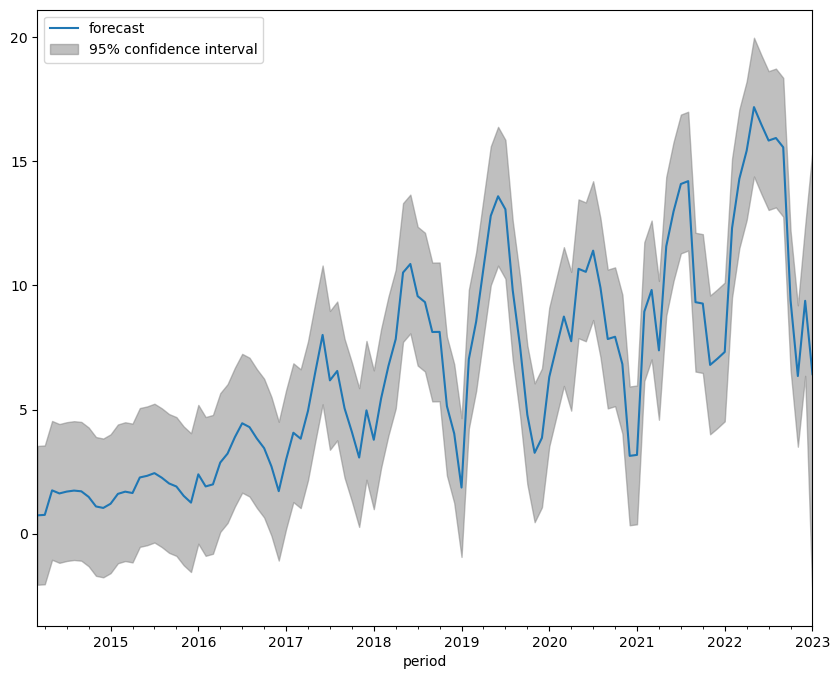

In [126]:
fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_predict(arima, ax=ax)
legend = ax.legend(loc="upper left")

In [127]:
sarimax = SARIMAX(y,order=(2,0,2),seasonal_order=(2,0,2,12)).fit()

C:\Users\jwj8c8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jwj8c8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [128]:
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  107
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 12)   Log Likelihood                -178.096
Date:                            Wed, 05 Apr 2023   AIC                            374.192
Time:                                    14:43:15   BIC                            398.247
Sample:                                         0   HQIC                           383.944
                                            - 107                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2225      0.472      0.471      0.638      -0.704       1.149
ar.L2          0.6789      0.434      1.563      0.118      -0.172       1.530
ma.L1          0.7592      0.480      1.581      0.114      -0.182       1.700
ma.L2          0.0988      0.112      0.884      0.377      -0.120       0.318
ar.S.L12      -0.0367      4.517     -0.008      0.994      -8.890       8.816
ar.S.L24       0.8331      3.941      0.211      0.833      -6.891       8.557
ma.S.L12       0.4134      4.690      0.088      0.930      -8.778       9.605
ma.S.L24      -0.5066      2.262     -0.224      0.823      -4.940       3.927
sigma2         1.4757      0.269      5.479      0.000       0.948       2.004
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                12.46
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

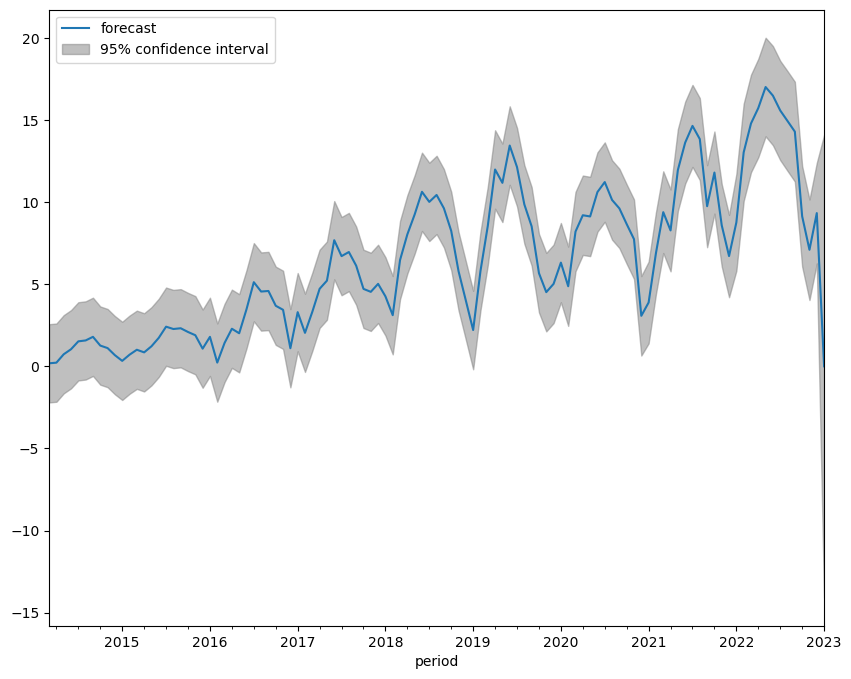

In [129]:
fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_predict(sarimax, ax=ax)
legend = ax.legend(loc="upper left")

In [130]:
try:
    (request := r.get(wind_monthly_url))
    print("Success")
except Exception as e:
    print(e)

Success


In [131]:
json_data = request.json()

In [132]:
wind_generation = pd.DataFrame(json_data.get('response').get('data'))

In [133]:
wind_generation.head()

,period,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription,generation,generation-units
0,2023-01,MO,Missouri,99,All Sectors,WND,wind,664.16199,thousand megawatthours
1,2022-12,MO,Missouri,99,All Sectors,WND,wind,765.94774,thousand megawatthours
2,2022-11,MO,Missouri,99,All Sectors,WND,wind,794.67596,thousand megawatthours
3,2022-10,MO,Missouri,99,All Sectors,WND,wind,568.17608,thousand megawatthours
4,2022-09,MO,Missouri,99,All Sectors,WND,wind,468.58903,thousand megawatthours


In [134]:
wind_generation.period = pd.to_datetime(wind_generation.period)

<AxesSubplot:xlabel='period', ylabel='generation'>

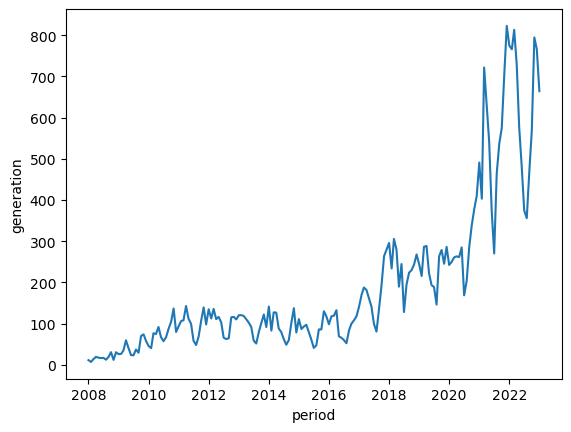

In [135]:
sns.lineplot(x="period",y="generation",data=wind_generation)

Hourly Prediction

In [136]:
solar_hourly_url = f"https://api.eia.gov/v2/electricity/rto/fuel-type-data/data/?frequency=hourly&data[0]=value&facets[fueltype][]=SUN&facets[respondent][]=MISO&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={api_key}"
wind_hourly_url = f"https://api.eia.gov/v2/electricity/rto/fuel-type-data/data/?frequency=hourly&data[0]=value&facets[respondent][]=MISO&facets[fueltype][]=WND&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={api_key}"

In [137]:
try:
    (request := r.get(solar_hourly_url))
    print("Success")
except Exception as e:
    print(e)

Success


In [138]:
json_data = request.json()

In [139]:
hourly_solar_generation = pd.DataFrame(json_data.get('response').get('data'))

In [140]:
hourly_solar_generation.head()

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2023-04-05T05,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,0,megawatthours
1,2023-04-05T04,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,0,megawatthours
2,2023-04-05T03,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,1,megawatthours
3,2023-04-05T02,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,3,megawatthours
4,2023-04-05T01,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,21,megawatthours


In [141]:
hourly_solar_generation.period = pd.to_datetime(hourly_solar_generation.period,utc=True)


In [142]:
hourly_solar_generation.head()

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2023-04-05 05:00:00+00:00,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,0,megawatthours
1,2023-04-05 04:00:00+00:00,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,0,megawatthours
2,2023-04-05 03:00:00+00:00,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,1,megawatthours
3,2023-04-05 02:00:00+00:00,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,3,megawatthours
4,2023-04-05 01:00:00+00:00,MISO,"Midcontinent Independent System Operator, Inc.",SUN,Solar,21,megawatthours


<AxesSubplot:xlabel='period', ylabel='value'>

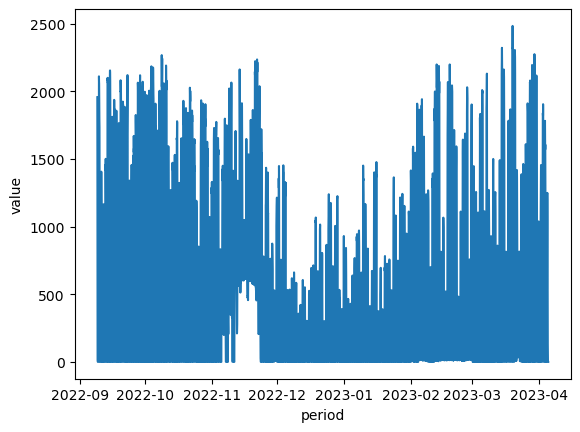

In [143]:
sns.lineplot(x="period",y="value",data=hourly_solar_generation)

In [144]:
try:
    (request := r.get(wind_hourly_url))
    print("Success")
except Exception as e:
    print(e)

Success


In [145]:
json_data = request.json()

In [146]:
hourly_wind_generation = pd.DataFrame(json_data.get('response').get('data'))

In [148]:
hourly_wind_generation.period = pd.to_datetime(hourly_wind_generation.period,utc=True)

In [169]:
hourly_wind_generation.head()

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2023-04-05 05:00:00+00:00,MISO,"Midcontinent Independent System Operator, Inc.",WND,Wind,16736,megawatthours
1,2023-04-05 04:00:00+00:00,MISO,"Midcontinent Independent System Operator, Inc.",WND,Wind,16146,megawatthours
2,2023-04-05 03:00:00+00:00,MISO,"Midcontinent Independent System Operator, Inc.",WND,Wind,15445,megawatthours
3,2023-04-05 02:00:00+00:00,MISO,"Midcontinent Independent System Operator, Inc.",WND,Wind,15290,megawatthours
4,2023-04-05 01:00:00+00:00,MISO,"Midcontinent Independent System Operator, Inc.",WND,Wind,15912,megawatthours


<AxesSubplot:xlabel='period', ylabel='value'>

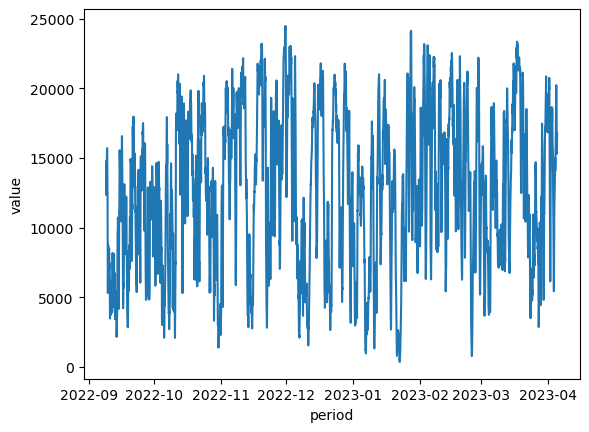

In [149]:
sns.lineplot(x="period",y="value",data=hourly_wind_generation)

Weather Data

In [150]:
weather_hourly_url = "https://api.weather.gov/stations/KSTL/observations?limit=500"

In [151]:
try:
    (request := r.get(weather_hourly_url))
    print("Successful")
except Exception as e:
    print(e)

Successful


In [152]:
json_data = request.json()

In [153]:
d= json.loads(request.text)

In [154]:
parsed = [d["features"][i]["properties"] for i in range(0,len(d["features"]))]

for i in range(0,len(parsed)):
    for key in parsed[i].keys():
        if isinstance(parsed[i][key],dict):
            if "value" in parsed[i][key]:
                parsed[i][key] = parsed[i][key]["value"]

In [155]:
hourly_observation_data = pd.DataFrame(parsed)

In [156]:
forecast_url = "https://api.weather.gov/gridpoints/LSX/89,80/forecast/hourly"

In [157]:
try:
    (request := r.get(forecast_url))
    print("Successful")
except Exception as e:
    print(e)

Successful


In [158]:
d = json.loads(request.text)

In [159]:
hourly_forecast_data = pd.DataFrame(d["properties"]["periods"])

In [160]:
hourly_forecast_data.head()

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
0,1,,2023-04-05T14:00:00-05:00,2023-04-05T15:00:00-05:00,True,60,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 3}","{'unitCode': 'wmoUnit:degC', 'value': 7.222222...","{'unitCode': 'wmoUnit:percent', 'value': 58}",17 mph,W,"https://api.weather.gov/icons/land/day/bkn,3?s...",Partly Sunny,
1,2,,2023-04-05T15:00:00-05:00,2023-04-05T16:00:00-05:00,True,60,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 5.555555...","{'unitCode': 'wmoUnit:percent', 'value': 51}",18 mph,W,"https://api.weather.gov/icons/land/day/bkn,0?s...",Partly Sunny,
2,3,,2023-04-05T16:00:00-05:00,2023-04-05T17:00:00-05:00,True,60,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 3.888888...","{'unitCode': 'wmoUnit:percent', 'value': 46}",18 mph,W,"https://api.weather.gov/icons/land/day/bkn,0?s...",Partly Sunny,
3,4,,2023-04-05T17:00:00-05:00,2023-04-05T18:00:00-05:00,True,60,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 3.333333...","{'unitCode': 'wmoUnit:percent', 'value': 44}",16 mph,W,"https://api.weather.gov/icons/land/day/sct,0?s...",Mostly Sunny,
4,5,,2023-04-05T18:00:00-05:00,2023-04-05T19:00:00-05:00,False,59,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': 2.222222...","{'unitCode': 'wmoUnit:percent', 'value': 42}",14 mph,NW,"https://api.weather.gov/icons/land/night/sct,0...",Partly Cloudy,


In [161]:
hourly_observation_data.head()

,@id,@type,elevation,station,timestamp,rawMessage,textDescription,icon,presentWeather,temperature,...,visibility,maxTemperatureLast24Hours,minTemperatureLast24Hours,precipitationLastHour,precipitationLast3Hours,precipitationLast6Hours,relativeHumidity,windChill,heatIndex,cloudLayers
0,https://api.weather.gov/stations/KSTL/observat...,wx:ObservationStation,172,https://api.weather.gov/stations/KSTL,2023-04-05T19:23:00+00:00,KSTL 051923Z 29013KT 10SM SCT023 BKN130 OVC210...,Cloudy,https://api.weather.gov/icons/land/day/ovc?siz...,[],10.0,...,16090,None,None,NaN,NaN,NaN,68.173049,NaN,NaN,"[{'base': {'unitCode': 'wmoUnit:m', 'value': 7..."
1,https://api.weather.gov/stations/KSTL/observat...,wx:ObservationStation,172,https://api.weather.gov/stations/KSTL,2023-04-05T18:51:00+00:00,KSTL 051851Z 30014G24KT 10SM BKN021 10/04 A299...,Mostly Cloudy,https://api.weather.gov/icons/land/day/bkn?siz...,[],10.0,...,16090,None,None,NaN,NaN,NaN,68.173049,NaN,NaN,"[{'base': {'unitCode': 'wmoUnit:m', 'value': 6..."
2,https://api.weather.gov/stations/KSTL/observat...,wx:ObservationStation,172,https://api.weather.gov/stations/KSTL,2023-04-05T18:05:00+00:00,KSTL 051805Z 29015G21KT 10SM OVC015 11/07 A298...,Cloudy,https://api.weather.gov/icons/land/day/ovc?siz...,[],10.6,...,16090,None,None,NaN,NaN,NaN,76.817807,NaN,NaN,"[{'base': {'unitCode': 'wmoUnit:m', 'value': 4..."
3,https://api.weather.gov/stations/KSTL/observat...,wx:ObservationStation,172,https://api.weather.gov/stations/KSTL,2023-04-05T17:51:00+00:00,KSTL 051751Z 28015KT 10SM OVC013 11/07 A2987 R...,Cloudy,https://api.weather.gov/icons/land/day/ovc?siz...,[],10.6,...,16090,None,None,NaN,NaN,20.0,79.496095,NaN,NaN,"[{'base': {'unitCode': 'wmoUnit:m', 'value': 4..."
4,https://api.weather.gov/stations/KSTL/observat...,wx:ObservationStation,172,https://api.weather.gov/stations/KSTL,2023-04-05T17:44:00+00:00,KSTL 051744Z 29015G22KT 10SM OVC011 11/07 A298...,Cloudy,https://api.weather.gov/icons/land/day/ovc?siz...,[],10.6,...,16090,None,None,NaN,NaN,NaN,79.496095,NaN,NaN,"[{'base': {'unitCode': 'wmoUnit:m', 'value': 3..."


In [162]:
hourly_observation_data.columns

Index(['@id', '@type', 'elevation', 'station', 'timestamp', 'rawMessage',
       'textDescription', 'icon', 'presentWeather', 'temperature', 'dewpoint',
       'windDirection', 'windSpeed', 'windGust', 'barometricPressure',
       'seaLevelPressure', 'visibility', 'maxTemperatureLast24Hours',
       'minTemperatureLast24Hours', 'precipitationLastHour',
       'precipitationLast3Hours', 'precipitationLast6Hours',
       'relativeHumidity', 'windChill', 'heatIndex', 'cloudLayers'],
      dtype='object')

In [163]:
observation_columns_to_keep = ["timestamp","textDescription","temperature","windSpeed",'windDirection']
hourly_observation_data = hourly_observation_data.loc[:,observation_columns_to_keep]

In [164]:
##Temp will need to be converted to Celsius
forecast_columns_to_keep = ["startTime","isDaytime","temperature","windSpeed","windDirection","shortForecast"]
hourly_forecast_data = hourly_forecast_data.loc[:,forecast_columns_to_keep]

In [165]:
hourly_observation_data.timestamp = pd.to_datetime(hourly_observation_data.timestamp).dt.round("H")

In [166]:
hourly_observation_data.head()

,timestamp,textDescription,temperature,windSpeed,windDirection
0,2023-04-05 19:00:00+00:00,Cloudy,10.0,24.12,290.0
1,2023-04-05 19:00:00+00:00,Mostly Cloudy,10.0,NaN,NaN
2,2023-04-05 18:00:00+00:00,Cloudy,10.6,27.72,290.0
3,2023-04-05 18:00:00+00:00,Cloudy,10.6,27.72,280.0
4,2023-04-05 18:00:00+00:00,Cloudy,10.6,27.72,290.0


In [170]:
hourly_observation_data.shape

(198, 5)

In [167]:
hourly_forecast_data.startTime = pd.to_datetime(hourly_forecast_data.startTime).dt.round("H")

Merge data sets

In [171]:
solar_weather = hourly_solar_generation.merge(hourly_observation_data,left_on="period" ,right_on="timestamp",how="inner")